In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/Pandas/')  

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df = pd.read_csv('bgg_scraped.csv')

for i in range(0,2000):
  if 'Not found' in df['categories'][i]:
    df['categories'][i] = "['Not found']"
  if 'Not found' in df['mechanics'][i]:
    df['mechanics'][i] = "['Not found']"

df["categories"] = df["categories"].apply(lambda x: eval(x))
df["mechanics"] = df["mechanics"].apply(lambda x: eval(x))

<ipython-input-3-126125a48770>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['categories'][i] = "['Not found']"
<ipython-input-3-126125a48770>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mechanics'][i] = "['Not found']"


In [4]:
def dummymaker(x, text):
  if text in x:
    return 1
  else : 
    return 0

In [5]:
import requests
from bs4 import BeautifulSoup
import re

url = r"https://boardgamegeek.com/browse/boardgamecategory"
page_data = requests.get(url)
soup = BeautifulSoup(page_data.content, 'html.parser')

links = soup.find_all("a")
listcat = []
a = []
for i in range(2,86):
  x = str(links[i])
  cat = re.split("<|>", x)[2]
  cat = cat.replace("amp;","")
  listcat = listcat + [cat]

url = r"https://boardgamegeek.com/browse/boardgamemechanic"
page_data = requests.get(url)
soup = BeautifulSoup(page_data.content, 'html.parser')

links = soup.find_all("a")
listmech = []
a = []
for i in range(2,193):
  x = str(links[i])
  mech = re.split("<|>", x)[2]
  listmech = listmech + [mech]

print(listcat)
print(listmech)

['Abstract Strategy', 'Action / Dexterity', 'Adventure', 'Age of Reason', 'American Civil War', 'American Indian Wars', 'American Revolutionary War', 'American West', 'Ancient', 'Animals', 'Arabian', 'Aviation / Flight', 'Bluffing', 'Book', 'Card Game', "Children's Game", 'City Building', 'Civil War', 'Civilization', 'Collectible Components', 'Comic Book / Strip', 'Deduction', 'Dice', 'Economic', 'Educational', 'Electronic', 'Environmental', 'Expansion for Base-game', 'Exploration', 'Fan Expansion', 'Fantasy', 'Farming', 'Fighting', 'Game System', 'Horror', 'Humor', 'Industry / Manufacturing', 'Korean War', 'Mafia', 'Math', 'Mature / Adult', 'Maze', 'Medical', 'Medieval', 'Memory', 'Miniatures', 'Modern Warfare', 'Movies / TV / Radio theme', 'Murder/Mystery', 'Music', 'Mythology', 'Napoleonic', 'Nautical', 'Negotiation', 'Novel-based', 'Number', 'Party Game', 'Pike and Shot', 'Pirates', 'Political', 'Post-Napoleonic', 'Prehistoric', 'Print & Play', 'Puzzle', 'Racing', 'Real-time', 'Rel

In [6]:
duplicate = [x for x in listmech if x in listcat]

for text in listcat :
  df[text] = df['categories'].apply(lambda x: dummymaker(x, text))
for text in listmech :
  if text in duplicate: 
    df[text+'_mechanics'] = df['mechanics'].apply(lambda x: dummymaker(x, text))
  else:
    df[text] = df['mechanics'].apply(lambda x: dummymaker(x, text))


<ipython-input-6-b8bb065a046a>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[text] = df['mechanics'].apply(lambda x: dummymaker(x, text))
<ipython-input-6-b8bb065a046a>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[text] = df['mechanics'].apply(lambda x: dummymaker(x, text))
<ipython-input-6-b8bb065a046a>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inst

In [7]:
df = df.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
df

,id,name,year,rank,weight,rating,player age,min player,max player,min playtime,...,Turn Order: Time Track,Variable Phase Order,Variable Player Powers,Variable Set-up,Victory Points as a Resource,Voting,Worker Placement,Worker Placement with Dice Workers,"Worker Placement, Different Worker Types",Zone of Control
0,174430,Gloomhaven,2017,1,3.888937,8.66608,14+,1,4,60,...,0,0,1,0,0,0,0,0,0,0
1,224517,Brass: Birmingham,2018,2,3.898923,8.64654,14+,2,4,60,...,0,0,0,1,0,0,0,0,0,0
2,161936,Pandemic Legacy: Season 1,2015,3,2.832344,8.56431,12+,2,4,60,...,0,0,1,0,0,0,0,0,0,0
3,342942,Ark Nova,2021,4,3.714385,8.55794,12+,1,4,90,...,0,0,1,1,0,0,0,0,0,0
4,233078,Twilight Imperium: Fourth Edition,2017,5,4.295896,8.63909,14+,3,6,240,...,0,1,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3720,Subbuteo,1947,1996,1.796992,6.97913,8+,2,2,20,...,0,0,0,0,0,0,0,0,0,0
1996,227072,The Chameleon,2017,1997,1.053571,6.59399,8+,3,8,15,...,0,0,0,0,0,1,0,0,0,0
1997,192802,Days of Ire: Budapest 1956,2016,1998,2.791667,7.31697,12+,1,4,60,...,0,0,0,0,0,0,0,0,0,0
1998,209001,Monster Lands,2018,1999,3.333333,7.22280,10+,1,4,60,...,0,0,0,0,0,0,0,1,0,0


In [8]:
df.head()

,id,name,year,rank,weight,rating,player age,min player,max player,min playtime,...,Turn Order: Time Track,Variable Phase Order,Variable Player Powers,Variable Set-up,Victory Points as a Resource,Voting,Worker Placement,Worker Placement with Dice Workers,"Worker Placement, Different Worker Types",Zone of Control
0,174430,Gloomhaven,2017,1,3.888937,8.66608,14+,1,4,60,...,0,0,1,0,0,0,0,0,0,0
1,224517,Brass: Birmingham,2018,2,3.898923,8.64654,14+,2,4,60,...,0,0,0,1,0,0,0,0,0,0
2,161936,Pandemic Legacy: Season 1,2015,3,2.832344,8.56431,12+,2,4,60,...,0,0,1,0,0,0,0,0,0,0
3,342942,Ark Nova,2021,4,3.714385,8.55794,12+,1,4,90,...,0,0,1,1,0,0,0,0,0,0
4,233078,Twilight Imperium: Fourth Edition,2017,5,4.295896,8.63909,14+,3,6,240,...,0,1,1,1,0,1,0,0,0,0


In [9]:
df['player age'] = df['player age'].apply(lambda x : x[:-1] if '+' in x else x[0])

In [10]:
df['player age'] = df['player age'].apply(lambda x : int(x))

In [11]:
df = df.rename(columns={'player age':'min age'})

In [12]:
df.head()

,id,name,year,rank,weight,rating,min age,min player,max player,min playtime,...,Turn Order: Time Track,Variable Phase Order,Variable Player Powers,Variable Set-up,Victory Points as a Resource,Voting,Worker Placement,Worker Placement with Dice Workers,"Worker Placement, Different Worker Types",Zone of Control
0,174430,Gloomhaven,2017,1,3.888937,8.66608,14,1,4,60,...,0,0,1,0,0,0,0,0,0,0
1,224517,Brass: Birmingham,2018,2,3.898923,8.64654,14,2,4,60,...,0,0,0,1,0,0,0,0,0,0
2,161936,Pandemic Legacy: Season 1,2015,3,2.832344,8.56431,12,2,4,60,...,0,0,1,0,0,0,0,0,0,0
3,342942,Ark Nova,2021,4,3.714385,8.55794,12,1,4,90,...,0,0,1,1,0,0,0,0,0,0
4,233078,Twilight Imperium: Fourth Edition,2017,5,4.295896,8.63909,14,3,6,240,...,0,1,1,1,0,1,0,0,0,0


In [ ]:
df.to_csv("bgg_dummy.csv")
df.to_excel("bgg_dummy.xlsx")

##Plot

In [14]:
cols = listcat + listmech
df_sum = df[cols].sum(axis=0)
# df_sum = df_sum[cols]
df_sum

Abstract Strategy                            98
Action / Dexterity                           43
Adventure                                   200
Age of Reason                                20
American Civil War                            7
                                           ... 
Voting                                       57
Worker Placement                            243
Worker Placement with Dice Workers           40
Worker Placement, Different Worker Types     41
Zone of Control                               7
Length: 275, dtype: int64

In [15]:
test_keys = cols
test_values = list(df_sum)

res = {}
for key in test_keys:
    for value in test_values:
        res[key] = value
        test_values.remove(value)
        break
# Printing resultant dictionary
print("Resultant dictionary is : " + str(res))

Resultant dictionary is : {'Abstract Strategy': 98, 'Action / Dexterity': 43, 'Adventure': 200, 'Age of Reason': 20, 'American Civil War': 7, 'American Indian Wars': 8, 'American Revolutionary War': 6, 'American West': 28, 'Ancient': 122, 'Animals': 131, 'Arabian': 11, 'Aviation / Flight': 19, 'Bluffing': 118, 'Book': 5, 'Card Game': 535, "Children's Game": 35, 'City Building': 159, 'Civil War': 13, 'Civilization': 109, 'Collectible Components': 37, 'Comic Book / Strip': 25, 'Deduction': 132, 'Dice': 170, 'Economic': 323, 'Educational': 32, 'Electronic': 7, 'Environmental': 43, 'Expansion for Base-game': 3, 'Exploration': 190, 'Fan Expansion': 0, 'Fantasy': 417, 'Farming': 63, 'Fighting': 270, 'Game System': 1, 'Horror': 103, 'Humor': 60, 'Industry / Manufacturing': 92, 'Korean War': 1, 'Mafia': 13, 'Math': 6, 'Mature / Adult': 7, 'Maze': 16, 'Medical': 14, 'Medieval': 172, 'Memory': 8, 'Miniatures': 172, 'Modern Warfare': 15, 'Movies / TV / Radio theme': 65, 'Murder/Mystery': 40, 'Mus

In [21]:
dfa = df.copy()

In [22]:
df_sum = dfa.append(res,ignore_index=True)

<ipython-input-22-dc84a81e56d3>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sum = dfa.append(res,ignore_index=True)


In [23]:
df_sum['name'] = df['name'].to_list() + ['sum']
df_sum = df_sum[['name']+cols]

In [24]:
cols = listcat+listmech
series_cat = df[listcat].sum(axis=0)
series_mech = df[listmech].sum(axis=0)
series_cat.sort_values(ascending=False)

Card Game          535
Fantasy            417
Economic           323
Fighting           270
Science Fiction    246
                  ... 
Music                3
Vietnam War          2
Korean War           1
Game System          1
Fan Expansion        0
Length: 84, dtype: int64

In [25]:
series_mech.sort_values(ascending=False)

Hand Management           707
Dice Rolling              618
Variable Player Powers    574
Set Collection            440
Open Drafting             403
                         ... 
Bids As Wagers              0
Auction: Dexterity          0
Ordering                    0
Impulse Movement            0
Resource Queue              0
Length: 191, dtype: int64

In [27]:
array = series_cat

df_catcount = pd.DataFrame(data=array,
                  index = listcat,
                  columns = ['frequency'])
df_catsort = df_catcount.sort_values('frequency')

In [28]:
array = series_mech

df_mechcount = pd.DataFrame(data=array,
                  index = listmech,
                  columns = ['frequency'])
df_mechsort = df_mechcount.sort_values('frequency')

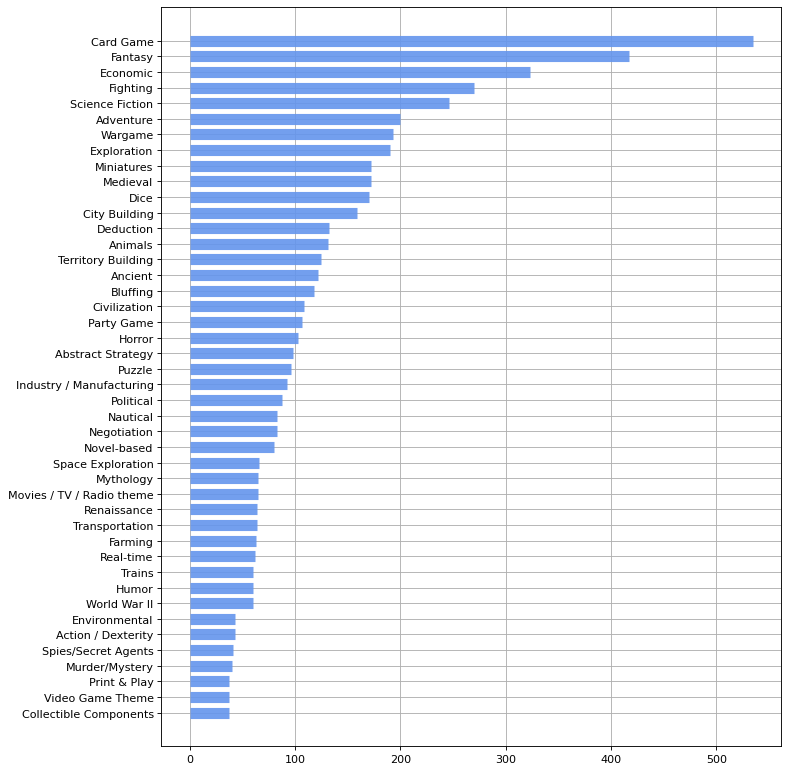

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 12), dpi=80)

# Plotting the horizontal lines
plt.hlines(y=df_catsort.index.values[40:], xmin=0, xmax=df_catsort['frequency'][40:],
            alpha=0.9, linewidth=10, color = 'cornflowerblue')

plt.grid()
plt.show()

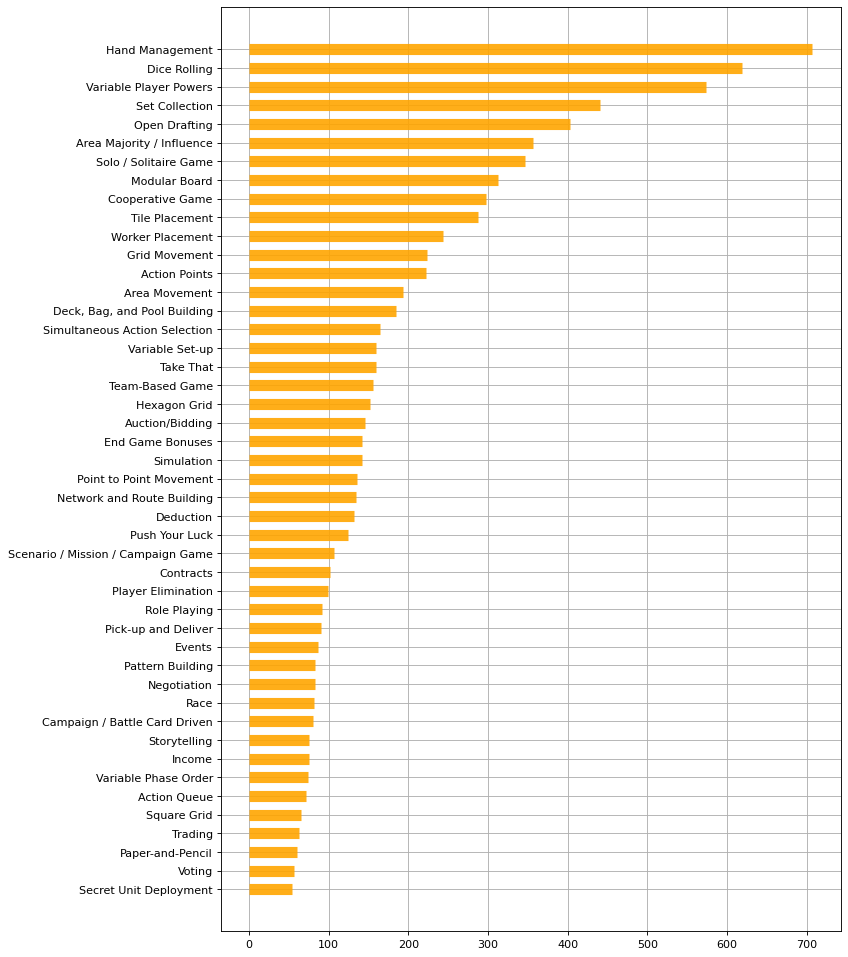

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 15), dpi=80)

# Plotting the horizontal lines
plt.hlines(y=df_mechsort.index.values[145:], xmin=0, xmax=df_mechsort['frequency'][145:],
            alpha=0.9, linewidth=10, color = 'orange')

plt.grid()
plt.show()

In [26]:
df_cat = df_sum[['name']+listcat]
df_mech = df_sum[['name']+listmech]

In [ ]:
df_cat.to_csv("bgg_sumcat.csv")
df_mech.to_csv("bgg_summech.csv")

Text(0, 0.5, 'rating')

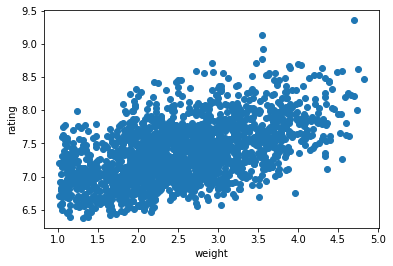

In [ ]:
plt.scatter(list(df['weight']),list(df['rating']))
plt.xlabel("weight")
plt.ylabel("rating")